In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [38]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, random_state=123, noise=1.0)

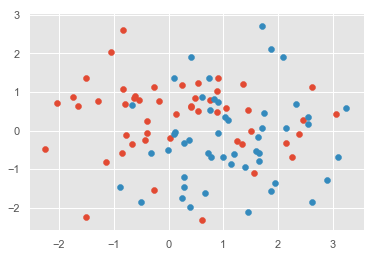

In [39]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0])
plt.scatter(X[:, 0][y==1], X[:, 1][y==1])

In [40]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

model = Pipeline([
                 ('poly', PolynomialFeatures(degree=3)),
                 ('scalar', StandardScaler()),
                 ('svm', LinearSVC(C=5, loss='hinge', random_state=33))
                 ])
                     # hinge: max(0, 1-t)
model.fit(X, y)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', LinearSVC(C=5, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=33, tol=0.0001, verbose=0))])

In [58]:
model.get_params()

{'memory': None,
 'poly': PolynomialFeatures(degree=3, include_bias=True, interaction_only=False),
 'poly__degree': 3,
 'poly__include_bias': True,
 'poly__interaction_only': False,
 'scalar': StandardScaler(copy=True, with_mean=True, with_std=True),
 'scalar__copy': True,
 'scalar__with_mean': True,
 'scalar__with_std': True,
 'steps': [('poly',
   PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)),
  ('scalar', StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('svm', LinearSVC(C=5, class_weight=None, dual=True, fit_intercept=True,
        intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
        penalty='l2', random_state=33, tol=0.0001, verbose=0))],
 'svm': LinearSVC(C=5, class_weight=None, dual=True, fit_intercept=True,
      intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
      penalty='l2', random_state=33, tol=0.0001, verbose=0),
 'svm__C': 5,
 'svm__class_weight': None,
 'svm__dual': True,
 'svm__fit_int

In [41]:
m1 = np.linspace(-3, 4, 100)
m2 = np.linspace(-4, 4, 100)

mx, my = np.meshgrid(m1, m2)
mxy = np.vstack([mx.ravel(), my.ravel()]).T 

In [42]:
predict = model.predict(mxy).reshape(mx.shape)
decision = model.decision_function(mxy).reshape(mx.shape)

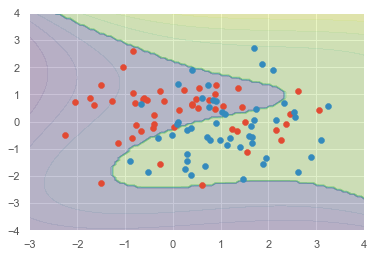

In [43]:
plt.style.use('ggplot')
plt.contourf(mx, my, predict, cmap='viridis', alpha=0.2)
plt.contourf(mx, my, decision, cmap='viridis', alpha=0.1)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0])
plt.scatter(X[:, 0][y==1], X[:, 1][y==1])

In [45]:
from sklearn.svm import SVC 

model_poly = Pipeline([
                        ('scalar', StandardScaler()),
                        ('svc', SVC(kernel='poly', degree=3, C=5))
                      ])

model_poly.fit(X,y)

Pipeline(memory=None,
     steps=[('scalar', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [47]:
predict_p = model_poly.predict(mxy).reshape(mx.shape)
decision_p = model_poly.decision_function(mxy).reshape(mx.shape)

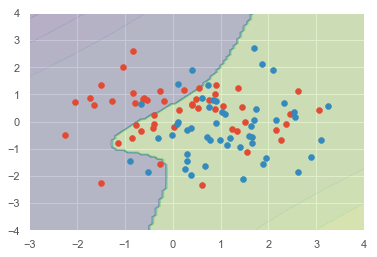

In [48]:
plt.style.use('ggplot')
plt.contourf(mx, my, predict_p, cmap='viridis', alpha=0.2)
plt.contourf(mx, my, decision_p, cmap='viridis', alpha=0.1)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0])
plt.scatter(X[:, 0][y==1], X[:, 1][y==1])

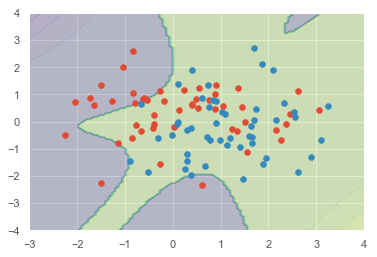

In [52]:
from sklearn.svm import SVC 

model_poly10 = Pipeline([
                        ('scalar', StandardScaler()),
                        ('svc', SVC(kernel='poly', degree=5, C=5))
                      ])

model_poly10.fit(X,y)
predict_p10 = model_poly10.predict(mxy).reshape(mx.shape)
decision_p10 = model_poly10.decision_function(mxy).reshape(mx.shape)
plt.style.use('ggplot')
plt.contourf(mx, my, predict_p10, cmap='viridis', alpha=0.2)
plt.contourf(mx, my, decision_p10, cmap='viridis', alpha=0.1)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0])
plt.scatter(X[:, 0][y==1], X[:, 1][y==1])

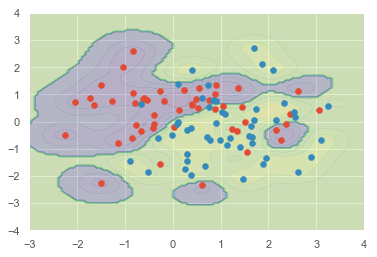

In [54]:
from sklearn.svm import SVC 

model_rbf = Pipeline([
                        ('scalar', StandardScaler()),
                        ('svc', SVC(kernel='rbf', gamma=5, C=1))
                      ])

model_rbf.fit(X,y)
predict_rbf = model_rbf.predict(mxy).reshape(mx.shape)
decision_rbf = model_rbf.decision_function(mxy).reshape(mx.shape)
plt.style.use('ggplot')
plt.contourf(mx, my, predict_rbf, cmap='viridis', alpha=0.2)
plt.contourf(mx, my, decision_rbf, cmap='viridis', alpha=0.1)

plt.scatter(X[:, 0][y==0], X[:, 1][y==0])
plt.scatter(X[:, 0][y==1], X[:, 1][y==1])

In [55]:
model_rbf.support_vectors 

AttributeError: 'Pipeline' object has no attribute 'support_vectors'

In [68]:
scaler = StandardScaler()
scaler.fit(X)
Xs = scaler.transform(X)

In [70]:
clf = SVC(kernel='rbf', gamma=5, C=1)
clf.fit(Xs, y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [75]:
from sklearn.grid_search import GridSearchCV

param_grid = {'C': [1, 5, 10, 50],
              'gamma': [1, 5, 10, 20, 50]}
grid = GridSearchCV(clf, param_grid)

%time grid.fit(Xs, y)
print(grid.best_params_)

Wall time: 125 ms
{'C': 5, 'gamma': 5}


In [76]:
clf.support_vectors_

array([[ 5.59489761e-01, -3.78688088e-01],
       [ 1.30068671e+00, -7.05371168e-01],
       [ 1.58791877e+00,  9.92857035e-01],
       [ 1.94771700e+00,  3.32498873e-01],
       [ 4.83765951e-01, -3.14497023e-01],
       [-1.92091533e-01,  5.22091008e-01],
       [-7.34838237e-01, -1.50713037e+00],
       [-1.16163939e+00,  5.80278030e-01],
       [-1.37626945e+00,  1.83882268e+00],
       [ 5.74343408e-01,  1.08173311e+00],
       [-1.86553242e+00,  5.27606610e-01],
       [ 7.33454454e-01, -1.10080956e+00],
       [ 1.45576404e+00,  1.98618470e-01],
       [-8.46613094e-01, -1.28137119e-01],
       [-3.28833779e-01,  1.04554464e+00],
       [-1.37661624e-01,  7.27121864e-01],
       [-8.93564481e-02,  1.10534510e+00],
       [ 1.39781402e+00, -1.33668265e-01],
       [ 1.99784576e-01,  1.20876906e+00],
       [ 1.21317915e+00, -3.53146056e-01],
       [-9.54801689e-01,  6.71834440e-01],
       [-1.20273999e+00,  9.42105688e-01],
       [-1.05949580e+00, -3.94751981e-01],
       [-9.

In [78]:
yhat = clf.predict(Xs)

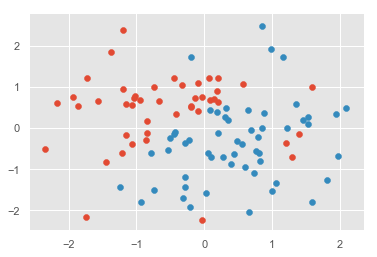

In [80]:
plt.scatter(Xs[:,0][yhat==0], Xs[:,1][yhat==0])
plt.scatter(Xs[:,0][yhat==1], Xs[:,1][yhat==1])

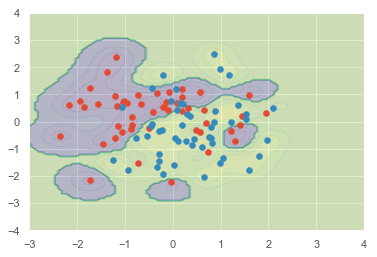

In [81]:
predict_clf = clf.predict(mxy).reshape(mx.shape)
decision_clf = clf.decision_function(mxy).reshape(mx.shape)
plt.style.use('ggplot')
plt.contourf(mx, my, predict_clf, cmap='viridis', alpha=0.2)
plt.contourf(mx, my, decision_clf, cmap='viridis', alpha=0.1)

plt.scatter(Xs[:, 0][y==0], Xs[:, 1][y==0])
plt.scatter(Xs[:, 0][y==1], Xs[:, 1][y==1])